# Supervised Learning : Random Forest (Bagging)

## Workspace setup

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
import missingno
from collections import Counter

import random
import math

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%matplotlib inline


# Machine learning models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.base import ClassifierMixin

## read and describe data

In [2]:
# read data
train= pd.read_csv('train_random_forest.csv')
train = train[:1000]

### previsualisation des donnees pour chaque fichier csv

print("### DESCRIPTION DU FICHIER ")
train.describe(include="all")

### DESCRIPTION DU FICHIER 


,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,1000,1000,986.000000,986.000000,988.000000,988.000000,1000.000000
unique,1000,1000,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.114452,37.459483,23.457692,78.226721,0.374000
std,NaN,NaN,26.034628,25.523357,3.859657,14.893653,0.484106
min,NaN,NaN,0.570000,1.200000,16.700000,27.000000,0.000000
25%,NaN,NaN,21.785000,19.532500,20.500000,67.000000,0.000000
50%,NaN,NaN,35.720000,33.075000,22.100000,83.000000,0.000000
75%,NaN,NaN,49.395000,47.615000,26.900000,91.000000,1.000000


In [3]:
train.head(10)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1
7,ID_MUEQIKPY6X5O,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1
9,ID_FR804PILRAZ0,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0


In [4]:
# data information 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   Datetime           1000 non-null   object 
 2   Sensor1_PM2.5      986 non-null    float64
 3   Sensor2_PM2.5      986 non-null    float64
 4   Temperature        988 non-null    float64
 5   Relative_Humidity  988 non-null    float64
 6   Offset_fault       1000 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


## Feature Analysis

<AxesSubplot:>

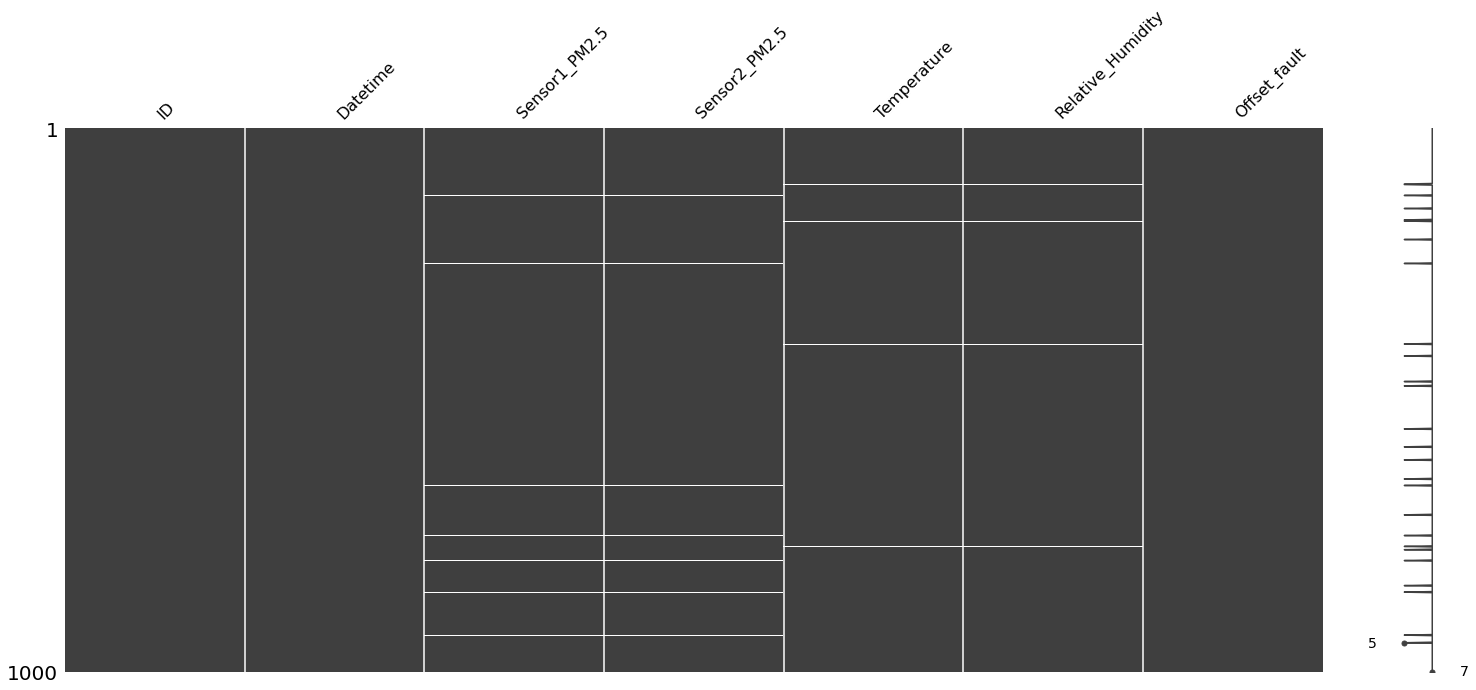

In [5]:
# Missing data in training set
missingno.matrix(train)

### Numerical features

### remove outliers

In [6]:
# # Detect outliers rows
# def detect_outliers(df, n, features):
#     outlier_indices = [] 
#     for col in features: 
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
#         outlier_step = 1.5 * IQR 
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col) 
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
#     return multiple_outliers

# outliers_to_drop = detect_outliers(train, 2, ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity'])

# print(" Indices of rows we'll drop: ".format(len(outliers_to_drop)), outliers_to_drop)

 Indices of rows we'll drop:  []


In [7]:
# # Outliers in numerical variables
# train.loc[outliers_to_drop, :]

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault


In [8]:
# Drop outliers and reset index

train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

<AxesSubplot:>

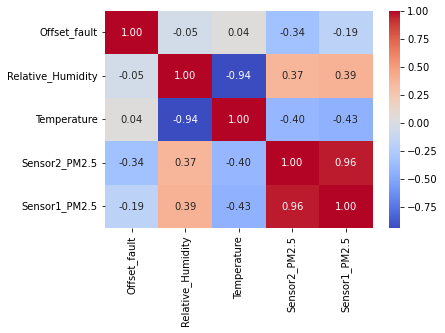

In [9]:
sns.heatmap(train[['Offset_fault', 'Relative_Humidity', 'Temperature', 'Sensor2_PM2.5', 'Sensor1_PM2.5']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Temperature feature

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

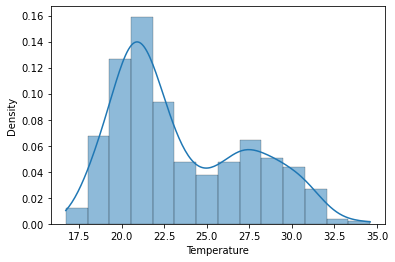

In [10]:
# Passenger age distribution
sns.histplot(train['Temperature'], kde=True, stat="density", linewidth=0.2)

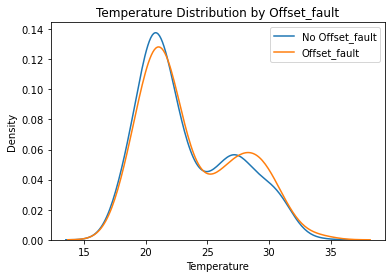

In [11]:
sns.kdeplot(train['Temperature'][train['Offset_fault'] == 0], label = 'No Offset_fault')
sns.kdeplot(train['Temperature'][train['Offset_fault'] == 1], label = 'Offset_fault')
plt.title('Temperature Distribution by Offset_fault')
plt.legend()

In [12]:
# Interpretation : Il n'y a quasiment aucune correlation entre la temperature et le Offset_fault car il est reparti de
# façon homogène quelque soit la temperature

### Relative Humidity feature

<AxesSubplot:xlabel='Relative_Humidity', ylabel='Density'>

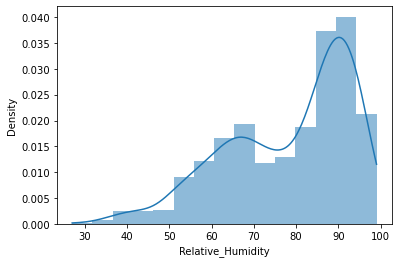

In [13]:
# Passenger age distribution

sns.histplot(train['Relative_Humidity'], kde=True, stat="density", linewidth=0)

### Sensor1_PM2.5 feature

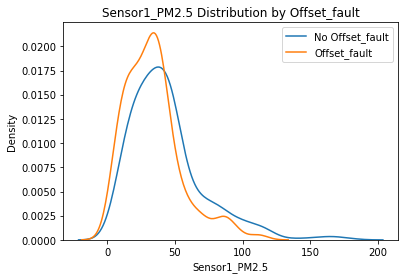

In [14]:
sns.kdeplot(train['Sensor1_PM2.5'][train['Offset_fault'] == 0], label = 'No Offset_fault')
sns.kdeplot(train['Sensor1_PM2.5'][train['Offset_fault'] == 1], label = 'Offset_fault')
plt.title('Sensor1_PM2.5 Distribution by Offset_fault')
plt.legend()

### Sensor2_PM2.5 feature

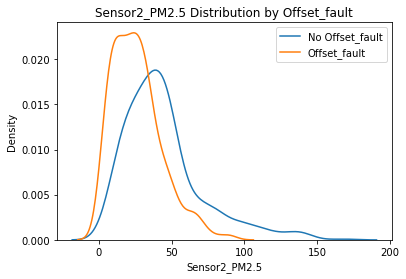

In [15]:
sns.kdeplot(train['Sensor2_PM2.5'][train['Offset_fault'] == 0], label = 'No Offset_fault')
sns.kdeplot(train['Sensor2_PM2.5'][train['Offset_fault'] == 1], label = 'Offset_fault')
plt.title('Sensor2_PM2.5 Distribution by Offset_fault')
plt.legend()

## Cleaning Data : Fill missing values and drop unecessary features

In [16]:
# Missing values in all data set 
df_all = train

df_all.isnull().sum().sort_values(ascending = False)

# on constate que :  
#  3614 valeurs dans la colonne Sensor1_PM2.5 sont nulles
#  3614 valeurs dans la colonne Sensor2_PM2.5 sont nulles
#  3549 valeurs dans la colonne Temperature sont nulles
#  3549 valeurs dans la colonne Relative_Humidity sont nulles

Sensor1_PM2.5        14
Sensor2_PM2.5        14
Temperature          12
Relative_Humidity    12
ID                    0
Datetime              0
Offset_fault          0
dtype: int64

<AxesSubplot:>

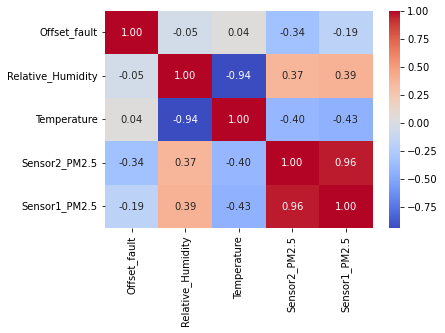

In [17]:
sns.heatmap(train[['Offset_fault', 'Relative_Humidity', 'Temperature', 'Sensor2_PM2.5', 'Sensor1_PM2.5']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [18]:
def fill_missing (data , column ,nan_indicices, corralated_features) :

# Loop through list and impute missing Sensor1_PM2.5
    median_value = data[column].median()
    
    for index in nan_indices:
        predict_value = data[column][(data[corralated_features] == data.iloc[index][corralated_features]) ].median()

        if np.isnan(predict_value):
            data[column].iloc[index] = median_value
        else:
            data[column].iloc[index] = predict_value
            
    return data

In [19]:
# filling missing values Temperature
# get row index of missing Temperature
nan_indices = list(df_all[df_all['Temperature'].isnull()].index)
data = fill_missing (df_all , 'Temperature' , nan_indices, 'Relative_Humidity')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
# filling missing values Temperature
# get row index of missing Temperature
nan_indices = list(df_all[df_all['Relative_Humidity'].isnull()].index)
data = fill_missing (df_all , 'Relative_Humidity' , nan_indices, 'Temperature')

In [21]:
# filling missing values
# get row index of missing Temperature
nan_indices = list(df_all[df_all['Sensor1_PM2.5'].isnull()].index)
data = fill_missing (df_all , 'Sensor1_PM2.5' , nan_indices, 'Sensor2_PM2.5')

In [22]:
# filling missing values
# get row index of missing Temperature
nan_indices = list(df_all[df_all['Sensor2_PM2.5'].isnull()].index)
data = fill_missing (df_all , 'Sensor2_PM2.5' , nan_indices, 'Sensor1_PM2.5')

In [23]:
df_all.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


## Feature engineering

### Drop Id column because it doesn't store useful information

In [24]:
# drop Name ID : unusable
if 'ID' in df_all :
    df_all = df_all.drop(['ID'], axis = 1)

### Split Date time in multiple column (year, month, day , hour and minute)

In [25]:
# train['year'] = pd.DatetimeIndex(train['Datetime']).year
# train['month'] = pd.DatetimeIndex(train['Datetime']).month
# train['day'] = pd.DatetimeIndex(train['Datetime']).day
# train['hour'] = pd.DatetimeIndex(train['Datetime']).hour
# train['minute'] = pd.DatetimeIndex(train['Datetime']).minute

### Drop Datetime column now

In [26]:
# drop Name ID : unusable
if 'Datetime' in df_all :
    df_all = df_all.drop(['Datetime'], axis = 1)

In [27]:
# map Temperature values into groups of numerical values

# df_all['Temperature_band'] , ageBandIntervals = pd.qcut(df_all['Temperature'], 10 , labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] , retbins=True)

In [28]:
# convert Temperature_band to int type
# df_all['Temperature_band'] = df_all['Temperature'].astype('int')

In [29]:
# drop Fare values
# df_all = df_all.drop(['Temperature'], axis = 1)

In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sensor1_PM2.5      1000 non-null   float64
 1   Sensor2_PM2.5      1000 non-null   float64
 2   Temperature        1000 non-null   float64
 3   Relative_Humidity  1000 non-null   float64
 4   Offset_fault       1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [31]:
# sns.heatmap(train[['year', 'month', 'day','hour','minute','Offset_fault']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [32]:
train = df_all

## Modelling 

In [33]:
X = train.drop('Offset_fault', axis = 1)
Y = train['Offset_fault']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, shuffle=True, random_state = 0 )

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (800, 4)
Y_train shape:  (800,)
X_test shape:  (200, 4)


### Decision Tree

In [34]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

84.0

In [35]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.89

### Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

88.5

Decision tree class and container for tree objects.
Used for creating decision tree objects, training
objects on data, and making predictions on new data

## Bagging Classifier

In [37]:
class CustomBaggingClassifier(ClassifierMixin):
    n_trees = 8
    tree_array = None
    rf_max_features = None
    
    
    #when finished, go back to accuracy
    def __init__(self, n_trees = 8, rf_max_features = None):
        # Initialize a bagging classifier with n_trees
        # Use sklearn.tree.DecisionTreeClassifier for the decision tree implementation
        
        # Steps:
        
        # Initialize member variables to passed in values
        
        self.n_trees = n_trees
        self.rf_max_features = rf_max_features
        
        # Initialize an empty numpy array of type object to
        # hold all classifiers/trees
        self.tree_array = np.empty(self.n_trees,dtype=object)
        
        # If this is an instance of a bagging classifier (i.e. rf_max_features is None),
        # instantiate all classifiers/trees with the default constructor;
        # Otherwise, we want random forests, so instantiate them with the
        # max_features constructor
        
        if self.rf_max_features == None:
            for i in range(self.n_trees):
                self.tree_array[i] = DecisionTreeClassifier()
            #end for i
        else:
            for i in range(self.n_trees):
                self.tree_array[i] = DecisionTreeClassifier(max_features=self.rf_max_features)
        

    # end __init__
    
    def fit(self, X, y):
        # Fit the bagging classifier
        # Given a pandas dataframe of inputs X, and a pandas series y,
        # fit each of n_trees on data obtained from X and y through
        # bootstrapping, i.e., creating a training set of the same
        # size as the original by random sampling with replacement
                
        # Steps:
        
        # Put together X, y so that you can pass it to
        # __generate_bootstraps to get all your bootstraps
        # (hint pandas concat function)
        target_col_name = y.name
        df = pd.concat([X,y],axis=1)
        
        # Call __generate_bootstraps to get all your bootstraps
        
        bootstraps = self.__generate_bootstraps(df)
        

        # Use the fit method of each one of your bagging classifiers
        # to fit it on its corresponding bootstrapped data set
        
        for i in range(self.n_trees):
            temp_bt = bootstraps[i]
            
            
            temp_y = pd.Series(temp_bt[target_col_name])
            temp_y = temp_y.astype("int")
            temp_x = temp_bt.drop([target_col_name],axis = 1)
            
            self.tree_array[i].fit(temp_x,temp_y)
        #end for i
        
    # end fit
    
    
    #Pre: a Dataframe X of independent variables
    #Post: A 1d list of predictions of the Xs (as some sort of series or numpy)
    def predict(self, X):
        # Return prediction for each example in X
        # Use majority voting on the individual tree predictions
        # to determine the prediction for the bagging classifier
        
        # Steps:
        
        rows = len(X)
        
        # Initialize an empty 2-D numpy array of type object to hold
        # the predictions for each tree and for each example
        temp = np.empty(shape=(self.n_trees,rows),dtype=object)
        
        # Use the predict method of each one of your bagging classifiers
        # to get predictions for each example in X
        for i in range(self.n_trees):
            temp[i] = self.tree_array[i].predict(X)
            
        #end for i
        
        # Use pandas mode method to get the majority prediction
        # for each one of the examples and that is what should
        # be returned to the caller

        
        temp_df = pd.DataFrame(temp)
        
        return temp_df.mode(axis=0)
        

        #return temp_df.mode(axis=0)
        
    # end predict
    
    def __generate_bootstraps(self, X_y):
        # Steps:
        
        rows = len(X_y)
        columns = X_y.columns
        
        # Initialize an empty numpy array of type object to
        # hold all pandas data frames representing a 
        # bootstrapped data set for each tree
        
        bootstraps = np.empty(self.n_trees,dtype=object)

        # For each tree
        for i in range(self.n_trees):
            
            # Initialize an empty data frame for this entry
            # in your empty numpy array
            
            temp = pd.DataFrame()
            
            # For each row in original data set
            for j in range(rows):
                # Append a random row from original data set
                # into this bootstrap
                # Hints: use numpy random.randint to get a
                # random row index;
                # use pandas iloc to get that exact row from
                # original data set and then use pandas
                # append to append it into this bootstrap
                
                temp = temp.append(X_y.iloc[random.randint(0,rows-1)])
            #end for j
            
            bootstraps[i] = temp
        #end for i
        
        
        # Return each bootstrap
        return bootstraps
    
   # end __generate_bootstraps


    


# BaggingClassifier

In [38]:
def accuracy(classifier, data):
    # Steps:
    rows = len(data)
    columns = data.columns
    num_columns = len(columns)
    
    y = pd.Series(data[columns[num_columns-1]])
    x = data.drop(columns[num_columns-1], axis = 1)
    
    
    # Get the predictions for this classifier
    # Get the actual classes for this data
    
    predictions = classifier.predict(x)
    
    correct = 0
    for i in range(rows):
        
        if predictions.iloc[0][i] == y.iloc[i]:
            correct = correct+1
        #end if
    #end for
    
    return correct/rows
    
    # Calculate percentage of correct classifications
    # and return it
# end accuracy

In [39]:
def get_accuracy():
    # Return the accuracy of bagging and random forest classifiers
    # Use 3-fold cross-validation to return the accuracy of
    # 1. Bagging
    # 2. Random forest
    # on the data.csv or the arrhythmia.csv data set
    
    #data = pd.read_csv("data.csv", header = None)
#     data = pd.read_csv("arrhythmia.csv", header=None)
    data = train
    data = data.sample(frac=1)
        
    
    sqrt_num_attrs = math.floor(math.sqrt(data.shape[1]))
    
    
    rows = len(data)
    columns = data.columns
    num_columns = len(columns)
    
    
    partition1 = int(rows/3)
    partition2 = partition1*2
    partition3 = rows
    
    
     #step 1: split data into 3 equal parts (randomize data beforehand)
        
    #data1,data2,data3
    dt1 = data[0:partition1]
    dt2 = data[partition1:partition2]
    dt3 = data[partition2:partition3]

    
  #step 2: create a validation and training set

    #training sets
    ts1 = dt2.append(dt3) #dt1 is the validation
    ts2 = dt1.append(dt3) #dt2 is the validation
    ts3 = dt1.append(dt2) #dt3 is the validation
    
    
    parameters = np.arange(4, 6, 1)
    for i in range(0, len(parameters)):

        num_trees = parameters[i]
        num_split_attrs = sqrt_num_attrs * parameters[i]
        
        # Do 3-fold cross validation for BaggingClassifier instances representing
        # (1) a bagging classifier and (2) a random forest classifier
        
        
        #step 3: build a bagging classifier object and .fit(training set)
        #bagging classifier objects
        
        bc1 = CustomBaggingClassifier(num_trees,None)
        bc1rf = CustomBaggingClassifier(num_trees,sqrt_num_attrs)
        bc2 = CustomBaggingClassifier(num_trees,None)
        bc2rf = CustomBaggingClassifier(num_trees,sqrt_num_attrs)
        bc3 = CustomBaggingClassifier(num_trees,None)
        bc3rf = CustomBaggingClassifier(num_trees,sqrt_num_attrs)
        
        
        #fitting the bagging classifiers for both bagging, and random forests
        ts1_y = pd.Series(ts1[columns[num_columns-1]])
        ts1_x = ts1.drop(columns[num_columns-1], axis = 1)
        
        ts2_y = pd.Series(ts2[columns[num_columns-1]])
        ts2_x = ts2.drop(columns[num_columns-1], axis = 1)
        
        ts3_y = pd.Series(ts3[columns[num_columns-1]])
        ts3_x = ts3.drop(columns[num_columns-1], axis = 1)
        
        bc1.fit(ts1_x,ts1_y)
        bc1rf.fit(ts1_x,ts1_y)
        
        bc2.fit(ts2_x,ts2_y)
        bc2rf.fit(ts2_x,ts2_y)
        
        bc3.fit(ts3_x,ts3_y)
        bc3rf.fit(ts3_x,ts3_y)

        
      #step 4: test for  the accuracy for the validation set and calc the average
    
        bagging_avg_accuracy = (accuracy(bc1,dt1) + accuracy(bc2,dt2) + accuracy(bc3,dt3)) / 3
        rf_avg_accuracy = (accuracy(bc1rf,dt1) + accuracy(bc2rf,dt2) + accuracy(bc3rf,dt3)) / 3
        
        
        

        print("BC:  num trees: {}, avg validation accuracy: {}".format(num_trees, bagging_avg_accuracy))
        print("RFC: num trees: {}, num split attrs: {}, avg validation accuracy: {}".format(num_trees, num_split_attrs, rf_avg_accuracy))
        
    # end for each parameter
# end get_accuracy

In [40]:
get_accuracy()

BC:  num trees: 1, avg validation accuracy: 0.811008613403823
RFC: num trees: 1, num split attrs: 2, avg validation accuracy: 0.7639525753298209
BC:  num trees: 2, avg validation accuracy: 0.8309656962351574
RFC: num trees: 2, num split attrs: 4, avg validation accuracy: 0.7689665713617809
BC:  num trees: 3, avg validation accuracy: 0.8439877002751254
RFC: num trees: 3, num split attrs: 6, avg validation accuracy: 0.8160316004627383
BC:  num trees: 4, avg validation accuracy: 0.8490016963070856
RFC: num trees: 4, num split attrs: 8, avg validation accuracy: 0.8240306174437911
BC:  num trees: 5, avg validation accuracy: 0.8579837322352293
RFC: num trees: 5, num split attrs: 10, avg validation accuracy: 0.8490106873340406
BC:  num trees: 6, avg validation accuracy: 0.8550047053041064
RFC: num trees: 6, num split attrs: 12, avg validation accuracy: 0.8189776602950256
BC:  num trees: 7, avg validation accuracy: 0.8599977222731714
RFC: num trees: 7, num split attrs: 14, avg validation accur

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sensor1_PM2.5      1000 non-null   float64
 1   Sensor2_PM2.5      1000 non-null   float64
 2   Temperature        1000 non-null   float64
 3   Relative_Humidity  1000 non-null   float64
 4   Offset_fault       1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [42]:
# # drop Name ID : unusable
# train = train.drop(['year'], axis = 1)
# train = train.drop(['month'], axis = 1)
# train = train.drop(['day'], axis = 1)
# train = train.drop(['hour'], axis = 1)
# train = train.drop(['minute'], axis = 1)
# train = train.drop(['Temperature_band'], axis = 1)